## Data Visualization
For Exploratory Data Analysis, it is very useful to be able to take data from csv files or dataframes and create visualizations to better understand and summarize what is contained within. Data visualization provides valuable insights allowing interpretability and relevance of the resulting figures. Visuals also help to communicate key points of data analysis much better than tables, raw numbers, or written summary statistics. Trends, outliers, and patterns in data can be much easier to see in simple visualizations. Python also allows for the creation of flexible data visualizations, so that a user can later change features and parameters of the visualization to better suit their purposes.

### Principles of data visualization
1. One principle of data visualization is to try and have a high *data to ink ratio*, so plots are not cluttered with unnecessary labels, boxes, and grids.
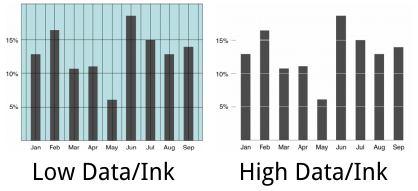

2. Beware your usage of color.
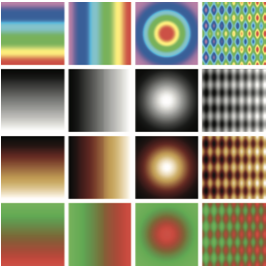

3. Don't use pie charts.
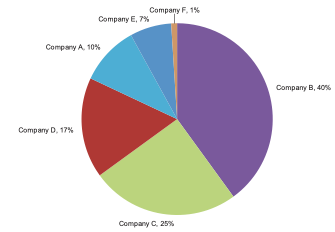

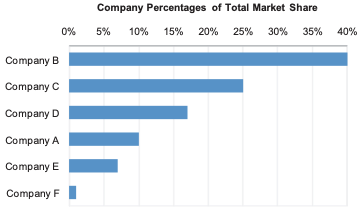

4. Use line graphs for time series.
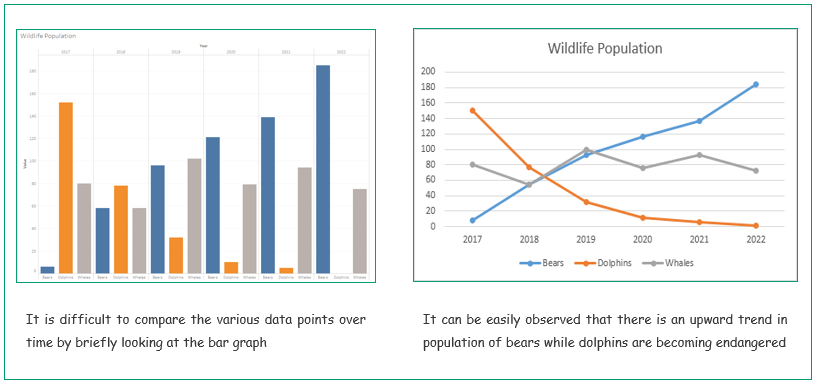

There are several packages which allow for data visualization. We'll focus on matplotlib; pandas visualization; seaborn; and plotly. To illustrate interaction with data sets, we will start by leveraging the built in iris data set.

There are three different species of iris in the data set, and we show some samples of the flowers here:
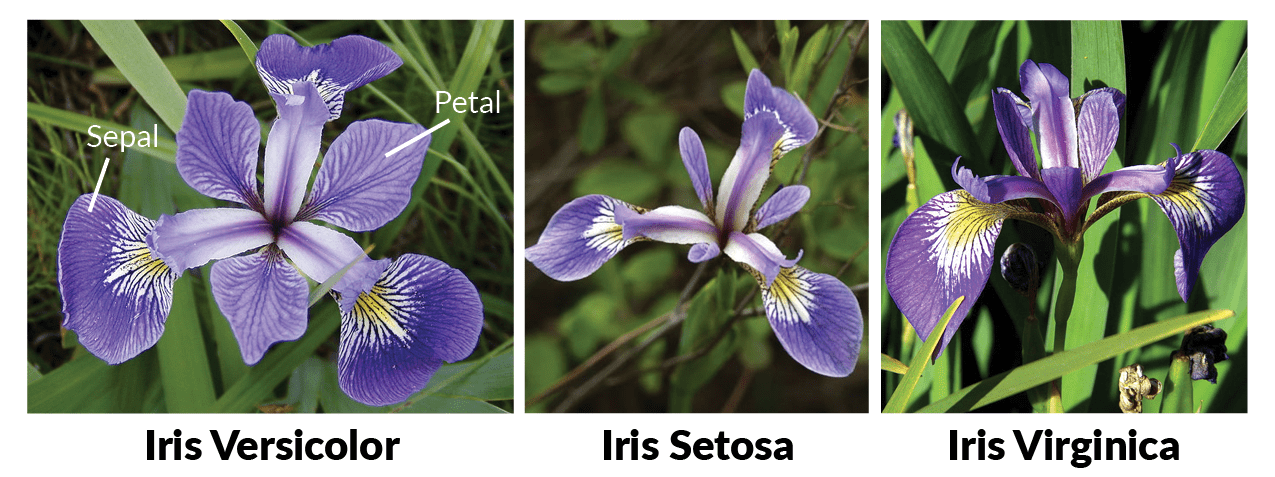

Let's start by loading the pandas package and the iris data set. Make sure the csv file is in a folder called csvfiles and that that folder is in the same directory as your jupyter notebook or else make sure and chart the path there in the read_csv command below.

In [3]:
import pandas as pd
iris = pd.read_csv('csvfiles/iris.csv')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Now, for those of you that have used MATLAB before, matplotlib's syntax will seem similar as it is built to resemble MATLAB plotting. The package is good for creating basic plots, but has a great deal of flexibility. Specifically, we'll import pyplot plotting commands.

In [4]:
import matplotlib.pyplot as plt

### Scatter plot
One useful form of plot within pyplot is scatter plotting, which employs the "scatter" command. We can also add labels to the plot using "xlabel" and "ylabel" commands. In particular, we'll plot the petal length against the sepal width.

Text(0, 0.5, 'petal length')

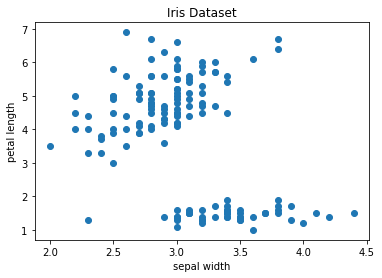

In [5]:
# create a scatter plot
plt.scatter(iris['sepal_width'], iris['petal_length'])
# set a title and labels
plt.title('Iris Dataset')
plt.xlabel('sepal width')
plt.ylabel('petal length')

We could also do several other things like recolor the dots, change the dots to stars (or something else), resize the dots, and resize the axis labels (even the tick label font). An example is given below, but for more details see the matplotlib documentation here (the bottom of the page gives several advanced examples):
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

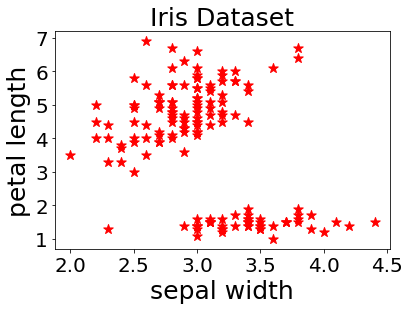

In [6]:
# create a scatter plot (note the options, s is markersize, color is marker color, marker is marker type (*: star))
plt.scatter(iris['sepal_width'], iris['petal_length'],s=10**2,color='r',marker='*')
# set a title and labels
plt.title('Iris Dataset',fontsize=25)
plt.xlabel('sepal width',fontsize=25)
plt.xticks(fontsize=20)
plt.ylabel('petal length',fontsize=25)
plt.yticks(fontsize=20)

Now, consider that simply by plotting, we've already acquired some valuable information about the data set. In particular, we can see the data are well separated into two clusters, one having short petal lengths but wide sepals, another with longer petals and a lower range of sepal widths. In the next section, we will explain how to systematically separate these data points using a method called clustering. At this point, however, it may be helpful to color each data point according to the species of flower.

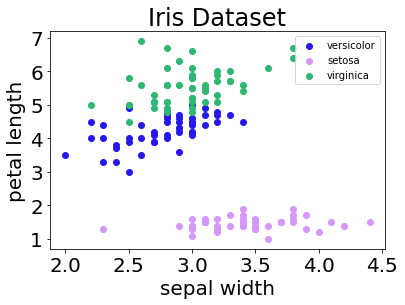

In [34]:
# need numpy to generate random numbers
import numpy as np

# identify the different species within the data set
species_set = set(iris['species'])

# create a list of colors (as 3-tuples) of the same length
n = len(species_set)
color_iris_vals = []
for i in range(n):
    color_iris_vals.append(np.random.rand(3,))

# zip them together in a dictionary
colors_iris = dict(zip(species_set, color_iris_vals))

for species in species_set:
    iris_temp = iris[iris['species']==species]
    plt.scatter(iris_temp['sepal_width'], iris_temp['petal_length'],color=colors_iris[species],label=species)
    
# set a title and labels
plt.title('Iris Dataset', fontsize=24)
plt.xlabel('sepal width', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('petal length',fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best')

Notice, the setosa species is the associated with shorter petals and wider sepals. Versicolor have medium petal length and narrower sepals; virginica have longer petals and wider sepals.

Alternatively, we can use pandas to perform scatter plotting as above, using the following command, which is rather simple for an unadorned plot:

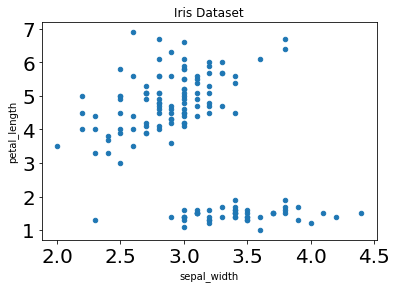

In [35]:
fig=iris.plot.scatter(x='sepal_width', y='petal_length', title='Iris Dataset', fontsize=20)

But if we want to do something like change the font of the axis labels or color code the different categories, we're back to needing more lines of code, and it's typically easier just to use matplotlib commands for this.

Text(0.5, 1.0, 'Iris Dataset')

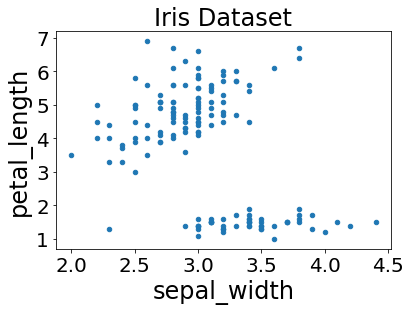

In [36]:
fig=iris.plot.scatter(x='sepal_width', y='petal_length', title='Iris Dataset', fontsize=20)
fig.set_xlabel('sepal_width',fontdict={'fontsize':24})
fig.set_ylabel('petal_length',fontdict={'fontsize':24})
fig.set_title('Iris Dataset',fontdict={'fontsize':24})

### Knowledge Check
Now that we've gone through one type of data visualization and learned a little bit about best practices, take a few minutes for the following knowledge check.
https://forms.gle/1RUSAFnwbT8aR96m7

### Exercise 1: Practicing scatter plotting.
In the following sequence of problems, you will replicate some of the commands we just learned for scatter plotting, applied to a data set focused on chemical composition data for a collection of 178 wines. In the section on clustering, we will revisit this data set and use analysis to try and recover the three growing regions based only on chemical properties.

**1.** Start by loading the file 'wine.csv' as a pandas dataframe and look at its header.

In [10]:
wine = pd.read_csv("csvfiles/wine.csv")
wine.head()

Class  alcohol  malic acid   ash  alkalinity  magnesium  phenols  \
0      1    14.23        1.71  2.43        15.6        127     2.80   
1      1    13.20        1.78  2.14        11.2        100     2.65   
2      1    13.16        2.36  2.67        18.6        101     2.80   
3      1    14.37        1.95  2.50        16.8        113     3.85   
4      1    13.24        2.59  2.87        21.0        118     2.80   

   flavanoids  nonflavanoid phenols  proanthocyanins  color   hue  \
0        3.06                  0.28             2.29   5.64  1.04   
1        2.76                  0.26             1.28   4.38  1.05   
2        3.24                  0.30             2.81   5.68  1.03   
3        3.49                  0.24             2.18   7.80  0.86   
4        2.69                  0.39             1.82   4.32  1.04   

   OD280/OD315  proline  
0         3.92     1065  
1         3.40     1050  
2         3.17     1185  
3         3.45     1480  
4         2.93      735

**2.** Now, start by scatter plotting the first two chemical component categories: alcohol and malic acid.

Text(0, 0.5, 'malic acid')

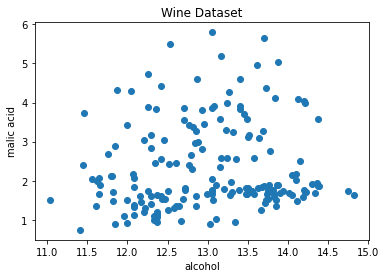

In [11]:
# create a scatter plot
plt.scatter(wine['alcohol'], wine['malic acid'])
# set a title and labels
plt.title('Wine Dataset')
plt.xlabel('alcohol')
plt.ylabel('malic acid')

**3.** Now make a scatter plot of those same chemical components, but plot large green triangles instead of the default blue dots.

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

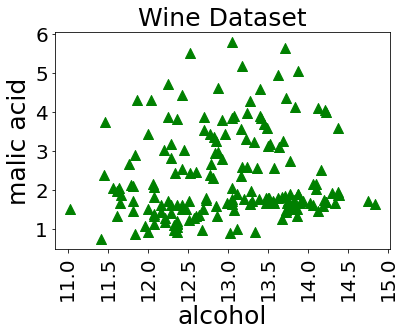

In [12]:
# create a scatter plot (note the options, s is markersize, color is marker color, marker is marker type (*: star))
plt.scatter(wine['alcohol'], wine['malic acid'],s=10**2,color='g',marker='^')

# set a title and labels
plt.title('Wine Dataset',fontsize=25)
plt.xlabel('alcohol',fontsize=25)
plt.xticks(fontsize=20,rotation=90)
plt.ylabel('malic acid',fontsize=25)
plt.yticks(fontsize=20)

**4.** Now make the same scatter plot except color code by class. Warning: Don't try and create a variable called "class" since this is a specific object in python. Use the variable name "class_" or something like this.

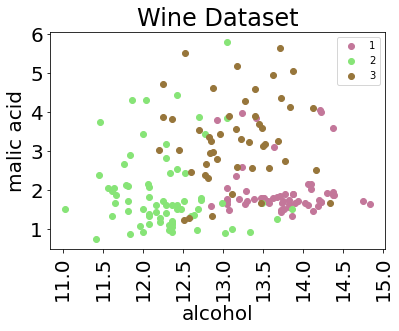

In [38]:
# need numpy to generate random numbers
import numpy as np

# identify the different species within the data set
class_set = set(wine['Class'])

# create a list of colors (as 3-tuples) of the same length
n = len(class_set)
color_wine_vals = []
for i in range(n):
    color_wine_vals.append(np.random.rand(3,))

# zip them together in a dictionary
colors_wine = dict(zip(class_set, color_wine_vals))

for class_ in class_set:
    wine_temp = wine[wine['Class']==class_]
    plt.scatter(wine_temp['alcohol'], wine_temp['malic acid'],color=colors_wine[class_],label=class_)
    
# set a title and labels
plt.title('Wine Dataset', fontsize=24)
plt.xlabel('alcohol', fontsize=20)
plt.xticks(fontsize=20,rotation=90)
plt.ylabel('malic acid',fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best')

### Histograms
As opposed to a scatter plot, a histogram can take data and bin it so that there is a more precise sense of the density of data values at each point. This is straightforward to execute in matplotlib using the "hist" command and labeling works much the same. Here we will do this to start for a single variable, but it is possible to plot 2d historgrams as we'll show.

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

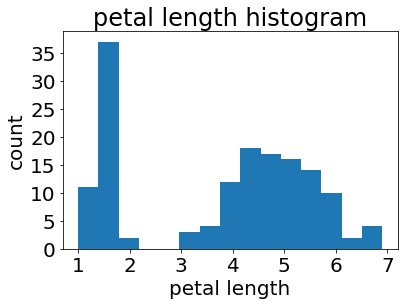

In [14]:
# make a plot of the density of petal lengths
plt.hist(iris['petal_length'],bins=15)
plt.title('petal length histogram', fontsize=24)
plt.xlabel('petal length', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('count',fontsize=20)
plt.yticks(fontsize=20)

The same sort of separation in petal lengths that we saw in the scatter plot is apparent here. Notice, we are able to set the number of bins we'd like to use with the "bins" option. We can also change the alignment of each bar (e.g., centered on the left bin edges), orientation of the bars, the color, and other options. If you change the orientation though, don't forget to change the x and y axis labels.

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

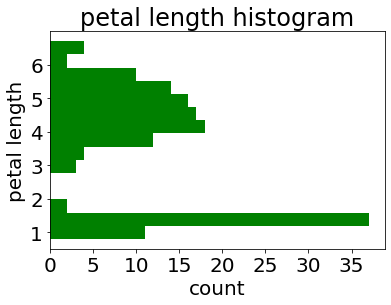

In [15]:
plt.hist(iris['petal_length'],bins=15,align='left',orientation='horizontal',color='g')
plt.title('petal length histogram', fontsize=24)
plt.xlabel('count', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('petal length',fontsize=20)
plt.yticks(fontsize=20)

Seaborn is another plotting package that actually has several handy options that require little text and look very slick. Standard histograms can be plotted, but another option is what's called a "kernel density estimate" (kde). The advantage of using this over a simple histogram is that it looks more like a continuous function and provides a standard way of estimating the distribution of any missing data in order to better fill in the scatter. We'll start by simply plotting a standard histogram using seaborn.

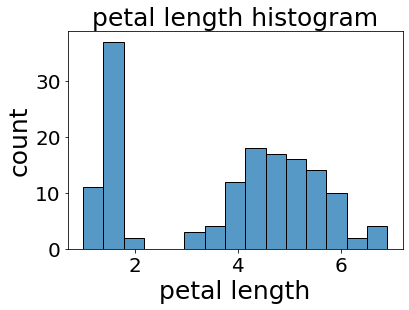

In [16]:
import seaborn as sns

fig = sns.histplot(iris['petal_length'], bins=15, kde=False)
fig.axes.set_title("petal length histogram",fontsize=25)
fig.set_xlabel("petal length",fontsize=25)
fig.set_ylabel("count",fontsize=25)
fig.tick_params(labelsize=20)

### Kernel density estimates.
OK. Now let's overlay with a kde plot. Notice, we can control the thickness of the kde line with the line_kws option. See here for more details on sns.histplot options:
https://seaborn.pydata.org/generated/seaborn.histplot.html

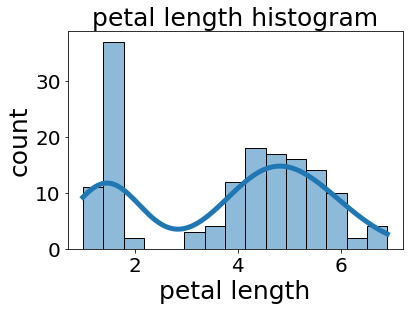

In [17]:
fig = sns.histplot(iris['petal_length'], bins=15, kde=True, line_kws={"linewidth":5})
fig.axes.set_title("petal length histogram",fontsize=25)
fig.set_xlabel("petal length",fontsize=25)
fig.set_ylabel("count",fontsize=25)
fig.tick_params(labelsize=20)

Now, we can control how wide or narrow we make the smoothing that goes into the kde. This is just an option in the histplot function called "bw_adjust": make it smaller to do less smoothing of the scatter plot data and larger (than one) to make it smoother.

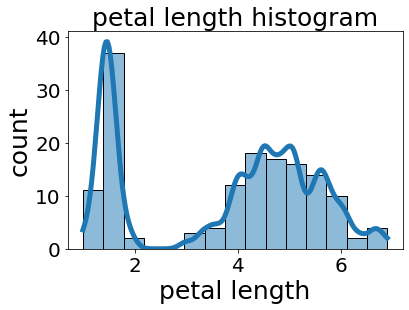

In [18]:
fig = sns.histplot(iris['petal_length'], bins=15, kde=True, kde_kws={'bw_adjust':0.2}, line_kws={"linewidth":5})
fig.axes.set_title("petal length histogram",fontsize=25)
fig.set_xlabel("petal length",fontsize=25)
fig.set_ylabel("count",fontsize=25)
fig.tick_params(labelsize=20)

Now, we can go a bit further with seaborn and subdivide the data into each species and make a differently colored histogram and kde plot for each. All that's needed is to plot a separate hue for each species and to use the "data" input so the function knows it's reading from a dataframe.

[None, None]

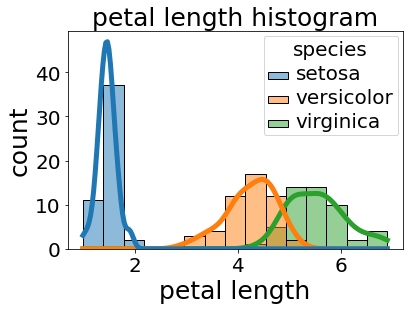

In [19]:
fig=sns.histplot(x= "petal_length",data=iris,bins=15,hue="species",kde=True,line_kws={"linewidth":5})

# label font sizes
fig.axes.set_title("petal length histogram",fontsize=25)
fig.set_xlabel("petal length",fontsize=25)
fig.set_ylabel("count",fontsize=25)
fig.tick_params(labelsize=20)
plt.setp(fig.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(fig.get_legend().get_title(), fontsize='20') # for legend title

### Exercise 2: Histograms and kernel density estimates.
Again, we will practice some of the skills learned above, in the case of histogram and KDE plotting using the wine chemical composition data set.

**5.** Plot a histogram of alcohol of all the wines in the wine data set.

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

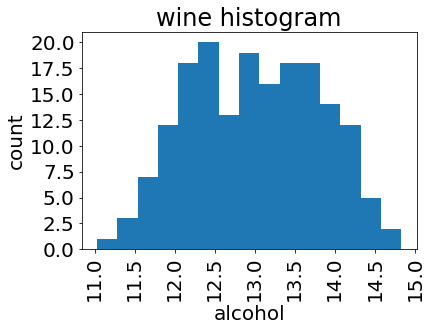

In [20]:
# make a plot of the density of petal lengths
plt.hist(wine['alcohol'],bins=15)
plt.title('wine histogram', fontsize=24)
plt.xlabel('alcohol', fontsize=20)
plt.xticks(fontsize=20,rotation=90)
plt.ylabel('count',fontsize=20)
plt.yticks(fontsize=20)

**6.** Plot the above histogram horizontally and with red bars.

(array([10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

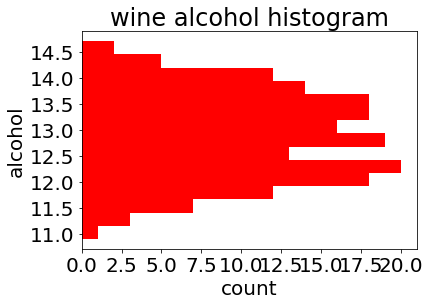

In [21]:
plt.hist(wine['alcohol'],bins=15,align='left',orientation='horizontal',color='r')
plt.title('wine alcohol histogram', fontsize=24)
plt.xlabel('count', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('alcohol',fontsize=20)
plt.yticks(fontsize=20)

**7.** Use seaborn to plot a histogram of wine alkalinity with a kernel density estimate plot overlaid.

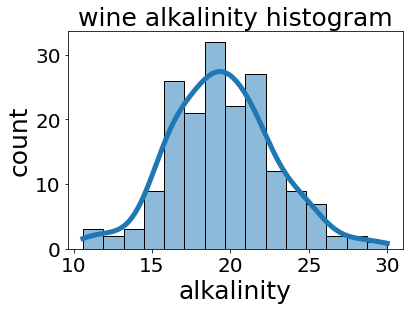

In [22]:
fig = sns.histplot(wine['alkalinity'], bins=15, kde=True, line_kws={"linewidth":5})
fig.axes.set_title("wine alkalinity histogram",fontsize=25)
fig.set_xlabel("alkalinity",fontsize=25)
fig.set_ylabel("count",fontsize=25)
fig.tick_params(labelsize=20)

**8.** Now color three separate histograms of the wine alkalinity based on wine class, along with kde's.

[None, None]

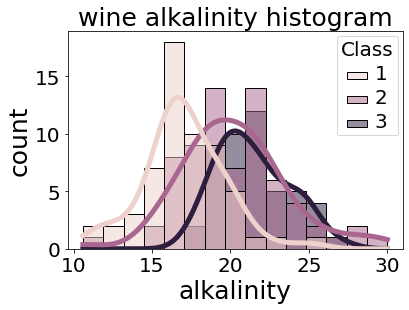

In [23]:
fig=sns.histplot(x= "alkalinity",data=wine,bins=15,hue="Class",kde=True,line_kws={"linewidth":5})

# label font sizes
fig.axes.set_title("wine alkalinity histogram",fontsize=25)
fig.set_xlabel("alkalinity",fontsize=25)
fig.set_ylabel("count",fontsize=25)
fig.tick_params(labelsize=20)
plt.setp(fig.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(fig.get_legend().get_title(), fontsize='20') # for legend title

### Pairplots
Now, if we'd like a much more expansive summary of the data in terms of histograms and scatter plots while we're performing exploratory data analysis, we can also use pairplot functions of either seaborn or pandas. The nice thing about this option in either case is that the command is rather short, but creates a very involved figure with lots of useful information.

Let's start with seaborn, where we use the single line:

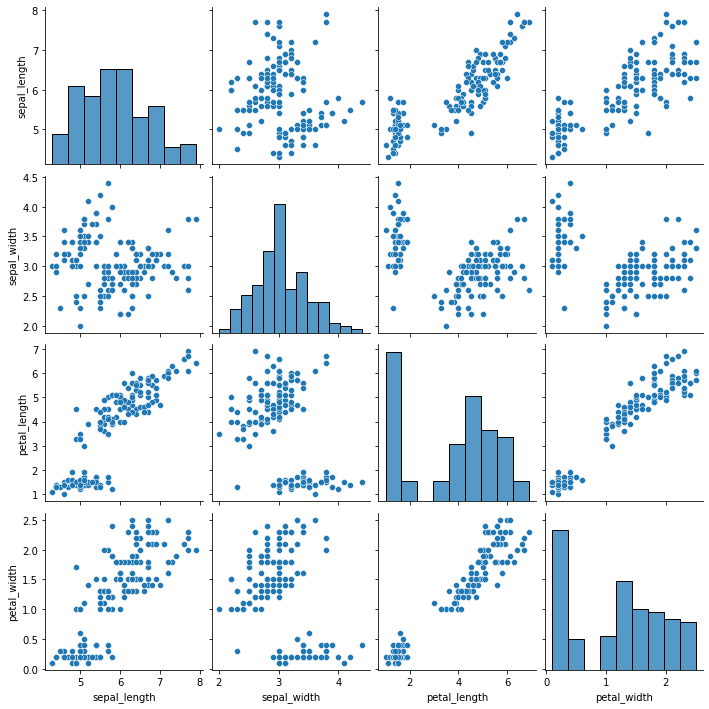

In [24]:
sns.pairplot(iris)

We don't have to plot the whole data set, but can just focus on a couple of variables by listing them under a vars option. In addition, we can also color code the species using the hue option.

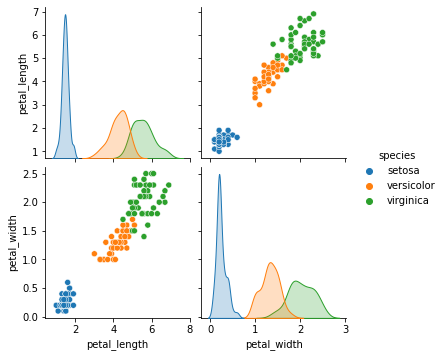

In [25]:
sns.pairplot(iris, vars=['petal_length','petal_width'],hue='species')

Along both the x and y axes of the grid, we see that the variable plotted against changes. The off-diagonal entries contain scatter plots and we can see these are well subdivided into two primary clusters in most variable pairings. We can also see the histograms of the four variables in the dataframe along the diagonal, showing how both petal length and width form two distinct clusters each. As mentioned, we will look more at algorithms for automating the selection of these clusters in the next lesson.

We can similarly perform a pairplot using the pandas package with the following command:

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

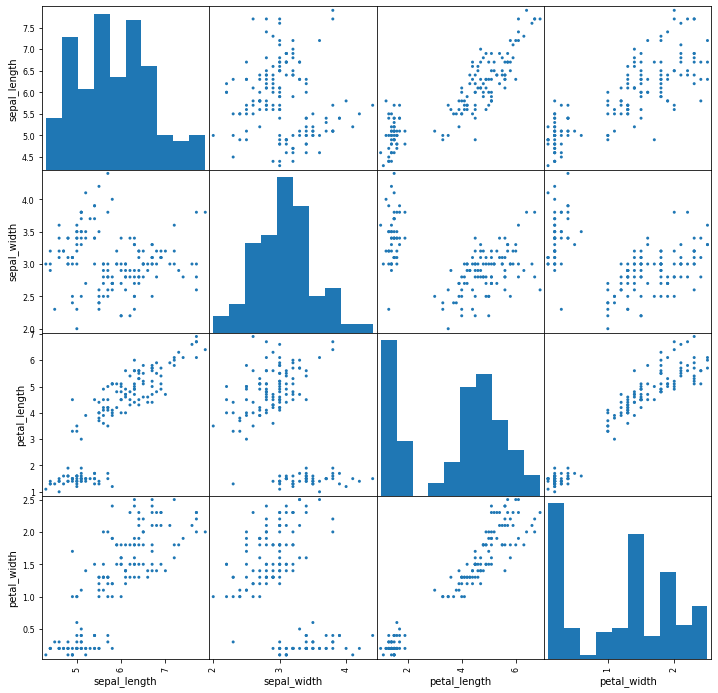

In [26]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris, alpha=1, figsize=(12, 12))

We can also just plot the subplot histograms without the scatter plots via the following command.

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

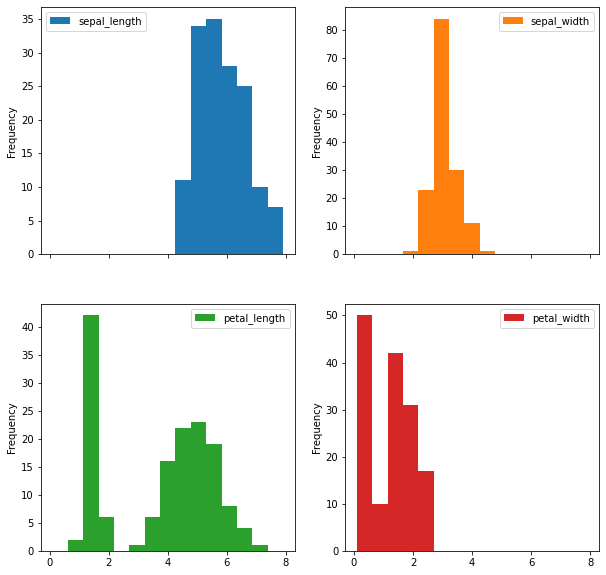

In [27]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=15)

One other thing we might be interested in doing is displaying the above two dimensional scatter plots in terms of densities or 2d histograms. Matplotlib, numpy, and seaborn all have ways of doing this. Let's do it the matplotlib way as it's relatively straightforward. In general, we only really need to do this if we have a lot of data points and scatterplots get too cluttered, but we'll do it here for illustration.

(array([1., 2., 3., 4., 5., 6., 7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

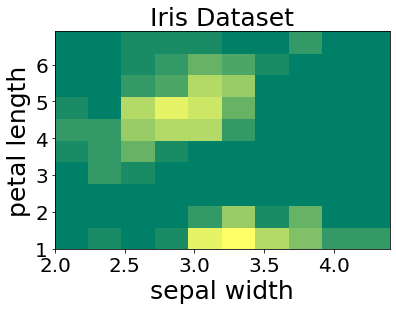

In [28]:
plt.hist2d(iris['sepal_width'], iris['petal_length'], bins=(10, 10), cmap=plt.cm.summer)

plt.title('Iris Dataset',fontsize=25)
plt.xlabel('sepal width',fontsize=25)
plt.xticks(fontsize=20)
plt.ylabel('petal length',fontsize=25)
plt.yticks(fontsize=20)

Note, the above is called a joint distribution because it represents the combined probability of observing an iris with both a given petal length and sepal width, jointly.

We see the same trends as in the scatter plots above, but now smoothed over by binning. Notice there are many colormaps to choose from, but it is generally best to pick one that is sequential and of only two colors: https://matplotlib.org/stable/tutorials/colors/colormaps.html

A related but slightly different way of representing a distribution of data points two-dimensionally is to use kernel density estimation in 2d, which results in a smoother look. Seaborn again has a nice way of doing this:

<AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>

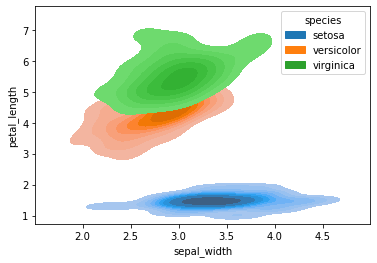

In [29]:
sns.kdeplot(data=iris, x="sepal_width", y="petal_length", hue="species", fill=True)

Notice, we've separated out the data using the species (into three categories), but we could also lump everything together:

<AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>

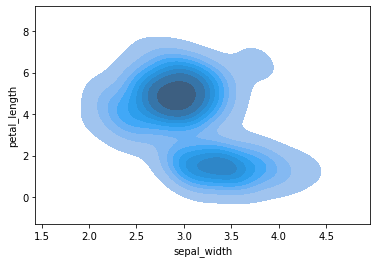

In [30]:
sns.kdeplot(data=iris, x="sepal_width", y="petal_length", fill=True)

### Principal Component Analysis and Dimension-Reduction
One useful tool to have in your exploratory data analysis arsenal is the ability to take high-dimensional data and reduce it to its most important dimensions. There are many ways of doing this. One easy way, which is quite accessible using python's scientific toolkit for data analysis is principal component analysis. The basic idea is to take a matrix of multiple data dimensions and project it to fewer dimensions for each data point. Note in our iris data set, we have in total 4 dimensions for each flower (in terms of numerical data), but that's hard to visualize. We don't want to necessarilly cut out one dimension when plotting. We showed above one way of representing all dimensions at once using pair plot, but this may be a bit unsatisfying, since each plot is merely a cross section.

Alternatively, we can use a dimension-reduction technique. One such commonly used method is called principal components analysis (PCA) whereby vectors of arbitrary dimension $n$ can be reduced to arbitrarily many dimensions. The key to this method is finding the vectors in the original coordinates along which the data vary the most, so that differences in these vectors will most likely differetiate data points.

1. Organize all $p$ data points into a matrix $X$, with vectors along each column.
2. Subtract the mean and scale by the standard deviation $z_j = (x_j - \bar{x}_j)/\sqrt{{\rm Var}(x_j)}$. Call the new matrix $Z$.
3. Form the covariance matrix $C = Z^TZ$.
4. Calculate the eigenvalues $\lambda_k$ and eigenvectors $v_k$ of $C$, such that $\lambda_k v_k = C v_k$, and sort them from largest $\lambda_1$ to smallest $\lambda_p$.
5. Assemble the matrix $V$ with all the eigenvectors along the columns, and right multiply to obtain $Z^* = Z P$.
6. Retain however many dimensions $q$ you like by just saving the first $q$ rows of $Z^*$. That will give the principal component weights for each data point.


To illustrate, let's apply PCA now to our iris data set. Now, we need to make sure an drop the string data since PCA can't be applied to that.

In [31]:
from sklearn.decomposition import PCA

# use the PCA method and extract two directions from the data
pca_2 = PCA(2)

# now turn the vote data into two columns using PCA
iris_num = iris.drop(['species'], axis=1)
pca_columns = pca_2.fit_transform(iris_num)

Now, let's plot the data in terms of these two reduced dimension to see how it is distributed. Remember that each dimension does not have an explicit physical meaning, but is rather statistically one of the most important directions in the higher dimensional space of quantitative data. 

(array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

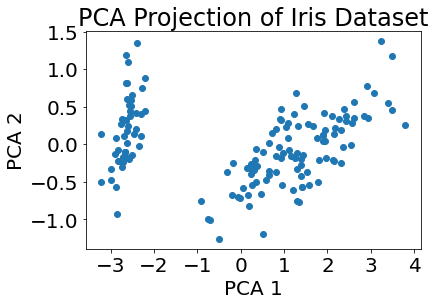

In [32]:
plt.scatter(pca_columns[:,0], pca_columns[:,1])
# set a title and labels
plt.title('PCA Projection of Iris Dataset', fontsize=24)
plt.xlabel('PCA 1', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('PCA 2',fontsize=20)
plt.yticks(fontsize=20)

Lo and behold, we see a similar split of the data as we do in the case of the higher dimensional data, but we can be more sure that this partitioning is significant and that there is not a hidden clumping of the data that we might find by carefully scanning through all four dimensions. We could actually now color the plot by species to see if the separation seen in the previous cuts hold up.

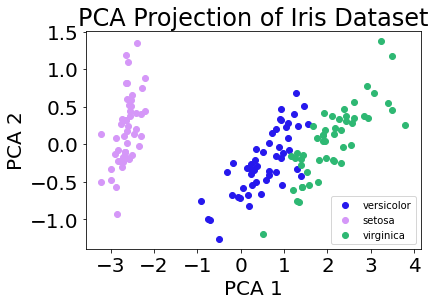

In [39]:
for species in species_set:
    pca_temp = pca_columns[iris['species']==species]
    plt.scatter(pca_temp[:,0], pca_temp[:,1],color=colors_iris[species],label=species)

# set a title and labels
plt.title('PCA Projection of Iris Dataset', fontsize=24)
plt.xlabel('PCA 1', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('PCA 2',fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best')

### Exercise 3: Pairplots and Principal Component Analysis.
We'll use the wine data set again to practice pair plotting as well as PCA.

**9.** Use seaborn to create a pairplot for the whole wine database. Can you pick out variables that seem strongly related?

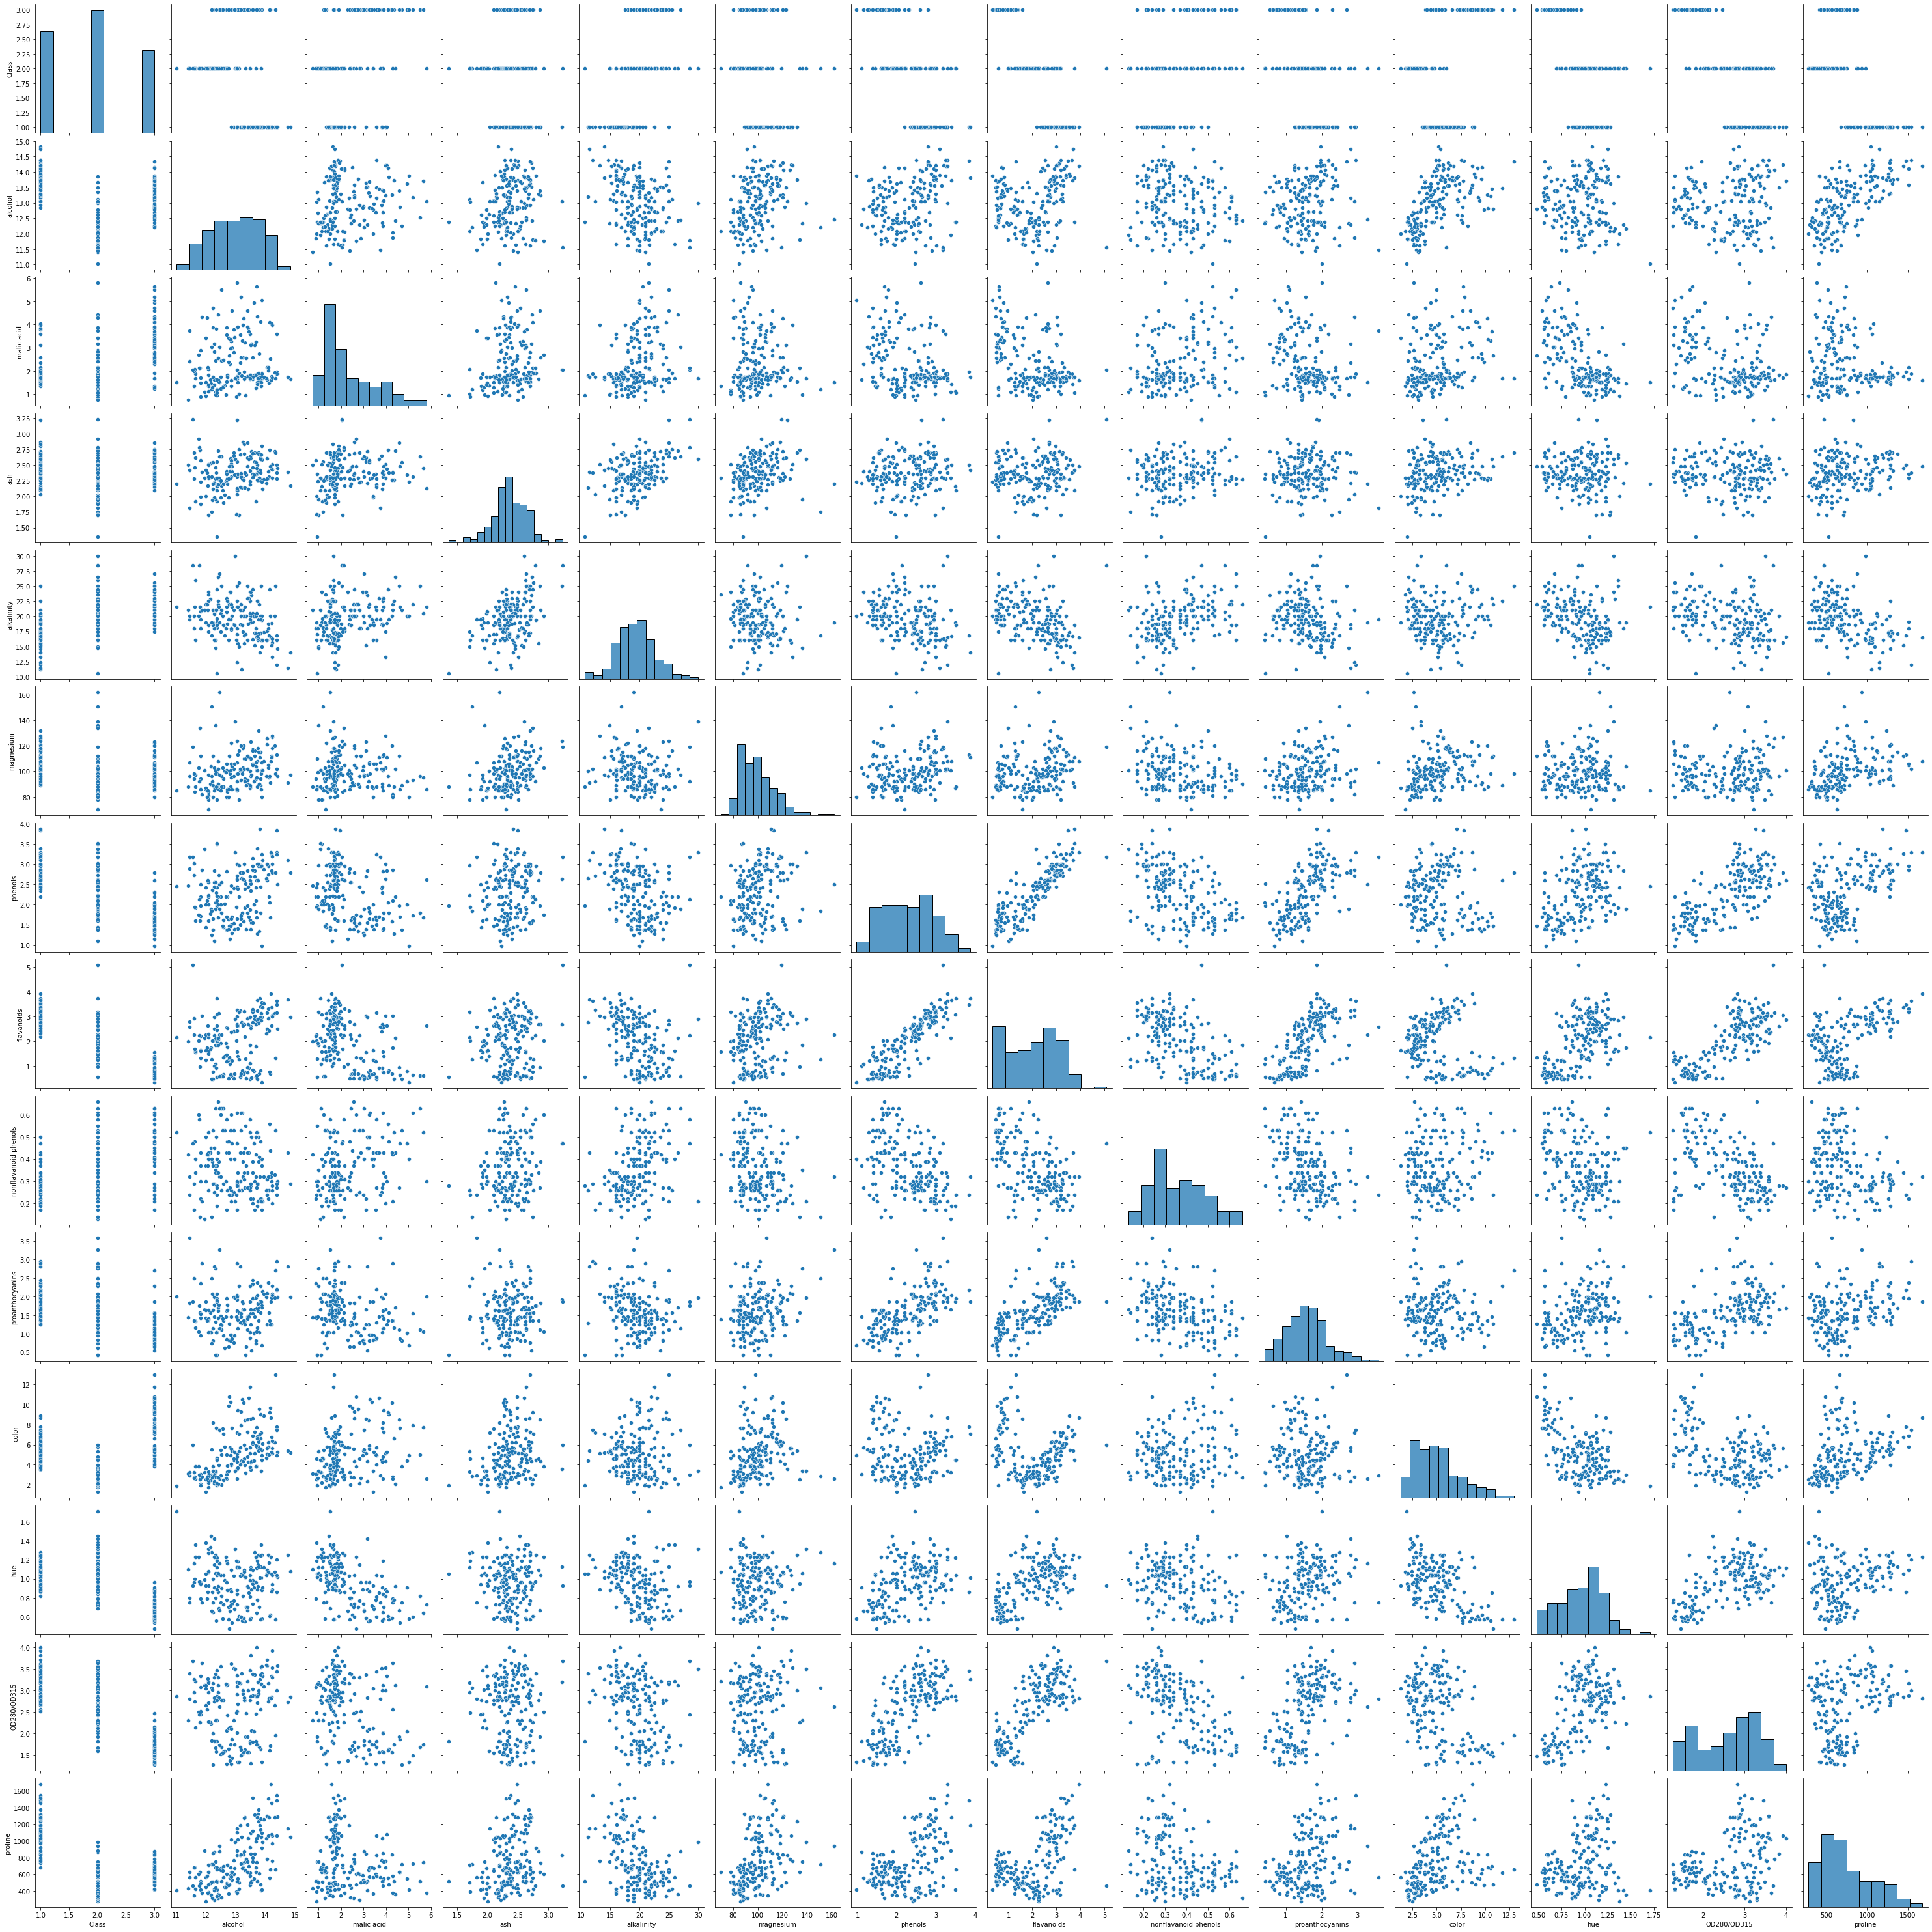

In [44]:
sns.pairplot(wine)

Yes. Flavanoids and phenols seem related. Also, there seems to be a strong relationship between flavanoids and OD280/OD315, as well as color and proline.

**10.** Using the vars option in pairplot, just plot the variables phenols, flavanoids, color, and proline and use the class to color points using the hue option.

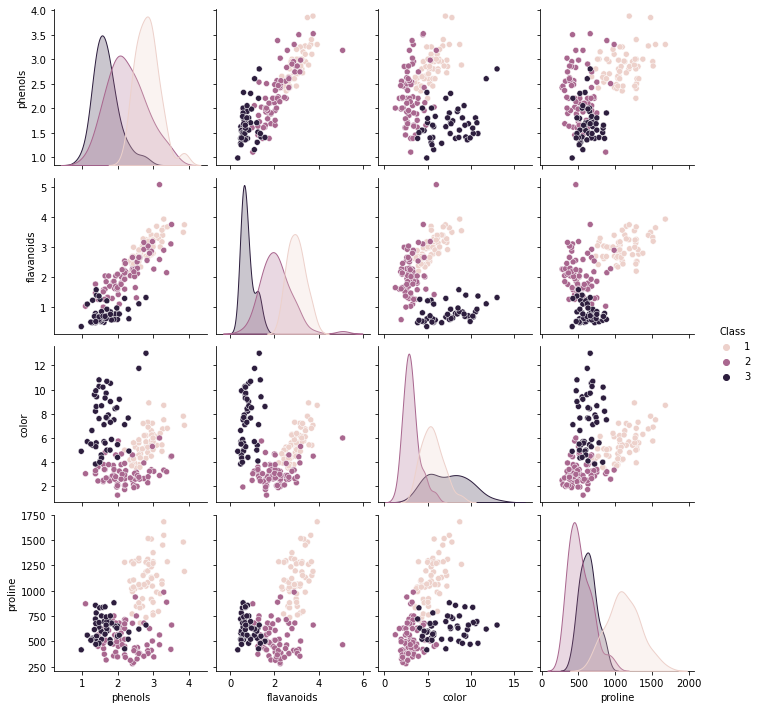

In [45]:
sns.pairplot(wine, vars=['phenols','flavanoids','color','proline'], hue='Class')

**11.** Create a 2d histogram plotting the joint distribution, the distribution of two variables at once, those being ash and magnesium in each wine. Do the two variables seem related?

(array([ 60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

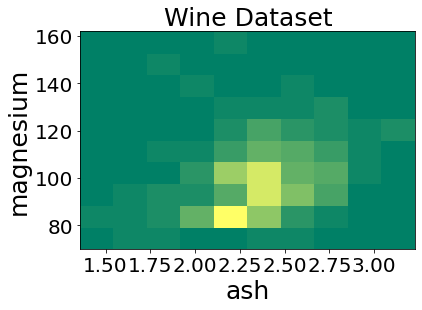

In [49]:
plt.hist2d(wine['ash'], wine['magnesium'], bins=(10, 10), cmap=plt.cm.summer)

plt.title('Wine Dataset',fontsize=25)
plt.xlabel('ash',fontsize=25)
plt.xticks(fontsize=20)
plt.ylabel('magnesium',fontsize=25)
plt.yticks(fontsize=20)

Yes, there seems to be some positive correlation between the two variables. As the level of ash increases, so to does the magnesium seem to.


**12.** Use PCA to transform the wine data set so the first two principal components of each data point are plotted. Color the dots according to the wine class.

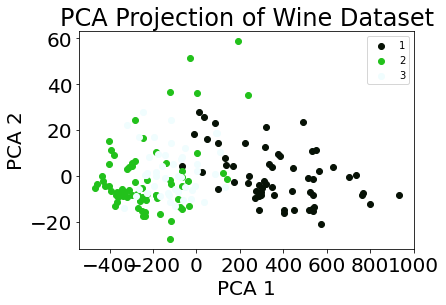

In [46]:
# use the PCA method and extract two directions from the data
pca_2 = PCA(2)

# now turn the vote data into two columns using PCA
wine_num = wine.drop(['Class'], axis=1)
pca_columns = pca_2.fit_transform(wine_num)

for class_ in class_set:
    pca_temp = pca_columns[wine['Class']==class_]
    plt.scatter(pca_temp[:,0], pca_temp[:,1],color=colors[class_],label=class_)

# set a title and labels
plt.title('PCA Projection of Wine Dataset', fontsize=24)
plt.xlabel('PCA 1', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('PCA 2',fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best')

### Bar graphs
We might also be interested in plotting means and variances of our four variables of interest. Dataframes have a straightforward way of doing this. In general, we can obtain a nice summary of statistics of each column using the following command:

In [47]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Showing the count, mean, std, min, max, and quartiles. Now, we can pick out the mean and std with commands of that name. We can then use a pandas command to plot.

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64
sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64


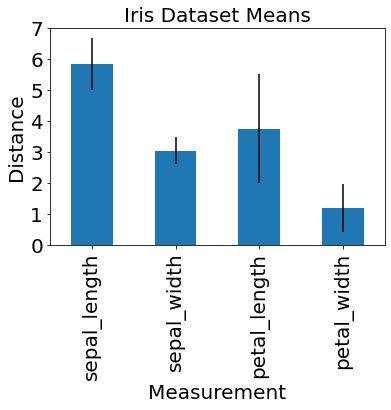

In [48]:
iris_mean = iris.mean()
print(iris_mean)
iris_std = iris.std()
print(iris_std)

fig = iris_mean.plot(legend=False,kind="bar",fontsize=20,yerr=iris_std);
fig.set_title("Iris Dataset Means", fontsize=20);
fig.set_xlabel("Measurement", fontsize=20);
fig.set_ylabel("Distance", fontsize=20);



Means are given by the bar lengths and the standard deviations are given by the error bars. We can also rotate these horizontally.

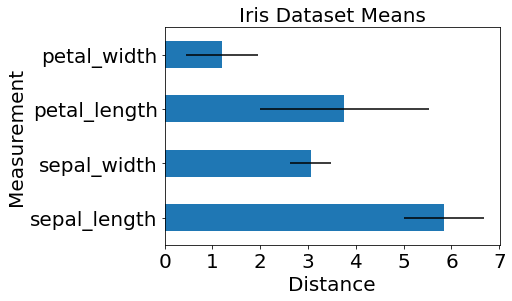

In [49]:
fig = iris_mean.plot.barh(legend=False,fontsize=20,xerr=iris_std);
fig.set_title("Iris Dataset Means", fontsize=20);
fig.set_xlabel("Distance", fontsize=20);
fig.set_ylabel("Measurement", fontsize=20);

### Box plots
Alternatively, we might be interested in displaying the five number summary (max/min, median, upper/lower quartile) of our data for each measurement. Pandas has a nice short command for doing this:

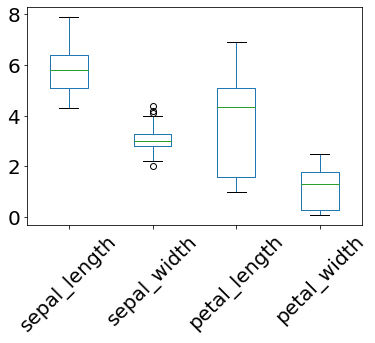

In [50]:
boxplot = iris.boxplot(grid=False, fontsize=20, rot=45)

Notice, we've rotated the x-axis labels by 45 degrees so they don't overlap.

### Line plots
Before moving to more advanced plotting options, let's now look a bit at line plotting functionality. It makes sense to plot lines when we have two related variables where one variable does not take on the same value twice (like for a time series). To illustrate we'll load in some stock market data from the S+P 500.

In [1]:
import pandas as pd
stocks = pd.read_csv('csvfiles/stocks.csv')
stocks['date']=pd.to_datetime(stocks['date'])
print(stocks.head())

        date   open   high    low  close    volume Name
0 2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1 2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2 2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3 2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4 2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


Now see that this csv file is in **long form**, which is convenient for not having too many columns, but inconvenient for easy visualization. Long form tables organize rows by items so are longer, but do not utilize the fact that you may simply be interested in the price of a particular stock on a particular day, which would work better for a matrix. See here for an illustration of *wide* vs *long* (or narrow) data:
https://en.wikipedia.org/wiki/Wide_and_narrow_data

What we can do is convert it into more of a matrix format using the pivot_table command in pandas. We simply specify the values used to fill out the data frame, the row index, and the distinct columns. We'll use the closing price of the stock each day as the number used to represent that stock's value.

In [52]:
stock_tab = pd.pivot_table(stocks, values='close', index='date',columns='Name')
print(stock_tab.head())

Name            A    AAL    AAP     AAPL   ABBV    ABC    ABT    ACN   ADBE  \
date                                                                          
2013-02-08  45.08  14.75  78.90  67.8542  36.25  46.89  34.41  73.31  39.12   
2013-02-11  44.60  14.46  78.39  68.5614  35.85  46.76  34.26  73.07  38.64   
2013-02-12  44.62  14.27  78.60  66.8428  35.42  46.96  34.30  73.37  38.89   
2013-02-13  44.75  14.66  78.97  66.7156  35.27  46.64  34.46  73.56  38.81   
2013-02-14  44.58  13.99  78.84  66.6556  36.57  46.77  34.70  73.13  38.61   

Name          ADI  ...     XL   XLNX    XOM   XRAY    XRX    XYL    YUM  \
date               ...                                                    
2013-02-08  45.70  ...  28.24  37.51  88.61  42.87  31.84  27.09  65.30   
2013-02-11  46.08  ...  28.31  37.46  88.28  42.84  31.96  27.46  64.55   
2013-02-12  46.27  ...  28.41  37.58  88.46  42.87  31.84  27.95  64.75   
2013-02-13  46.26  ...  28.42  37.80  88.67  43.08  32.00  28.26  64.41

matplotlib does just fine recognizing dates for plotting purposes and can thus show stock closing prices as a function of time. The simple command "plot" in matplotlib is used for this.

<AxesSubplot:xlabel='date'>

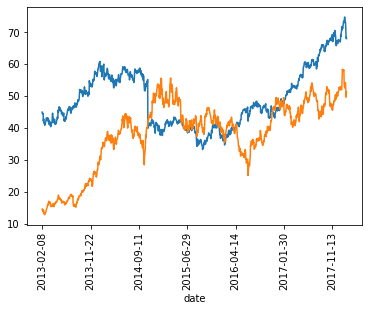

In [53]:
# create a scatter plot
# need to fix the pivot-table stacking
stock_tab['A'].plot(rot=90)
stock_tab['AAL'].plot(rot=90)

Notice, we used the 'rot' option to make sure the date tick labels are vertical. We can also make the lines thicker and add a legend.

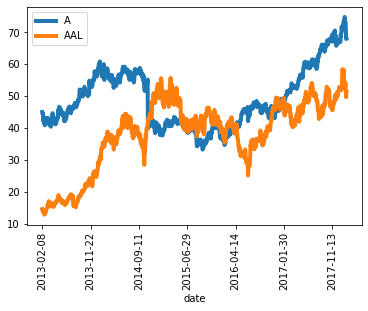

In [54]:
stock_tab['A'].plot(rot=90,lw=4,label='A')
stock_tab['AAL'].plot(rot=90,lw=4,label='AAL')
plt.legend(loc="upper left")

We could also loop through the 10 first stocks and plot them to get a better sense of the pattern.

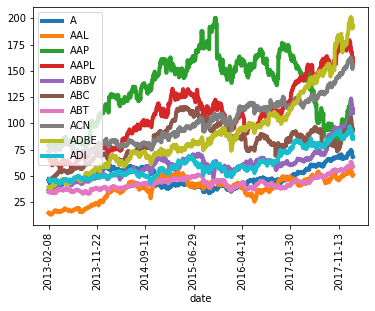

In [55]:
stock_labs=stock_tab.columns
stock_labs=stock_labs[0:10]

for stock in stock_labs:
    stock_tab[stock].plot(rot=90,lw=4,label=stock)

plt.legend(loc="upper left")

### Exercise 4: Boxplots and Lineplots.
Now, let's work through some of those boxplot plotting skills with the wine data set and repeat some of the line plotting using the stocks data set again.

**13.** Use the pandas command to visualize the five number summary of each variable in the wine list as a boxplot. Which variables statistics can be seen most clearly?

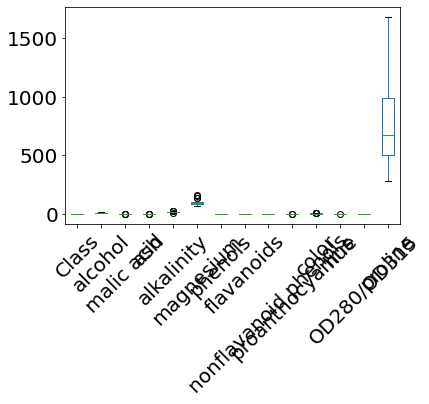

In [56]:
boxplot = wine.boxplot(grid=False, fontsize=20, rot=45)

It's easiest to see OD280/OD315, but it obscures the plotting of other variables because of the scale.

**14.** Notice that proline and magnesium are large, making it hard to see the boxplots of the other variables. Make a new dataframe where these are dropped and redo the boxplotting. Whick variables seem to have high variance and several outliers in their data set?

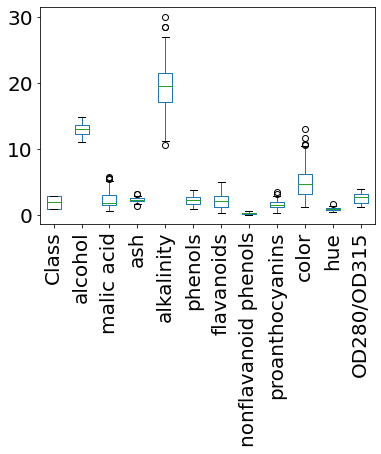

In [59]:
wine_drop = wine.drop(['magnesium','proline'], axis=1)
boxplot = wine_drop.boxplot(grid=False, fontsize=20, rot=90)

Alkalinity and color seem to have high variance and a few outliers each.


**15.** Create a line plot of the last 10 stocks from the stocks data set. Is there a particular time interval where there seemed to be an abrupt change in stock prices?

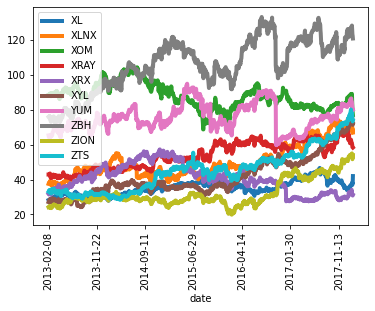

In [61]:
stock_labs=stock_tab.columns
stock_labs=stock_labs[-10:]

for stock in stock_labs:
    stock_tab[stock].plot(rot=90,lw=4,label=stock)

plt.legend(loc="upper left")

There was an abrupt change in stocks a little bit before January 30, 2017. That was around when the 2016 election occurred, so may have been a response to stock sell offs then.

### Choropleth Maps
Time for a bit of bonus material, if we have time for it. Choropleth maps are a way of graphically visualizing on top of geographical maps. For instance, you probably saw many of these over the past year or so indicating the frequency of COVID-19 cases in different parts of the US or world. It's essentially a heat map, but the plot tesselations are geographical regions. We will now demonstrate how to make such graphs using the plotly package.

If you do not have plotly installed already, you can do it quickly here with the following command.

In [33]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


Now, to import plotly and the express plotting feature. We will use the choropleth map feature to pull out a map of the US and plot it.

In [1]:
import plotly

import plotly.express as px

fig = px.choropleth(locationmode="USA-states", color=[1], scope="usa")

fig.show()

On top of this map, we would like to indicate specific states, which we can do by referencing specific states by their two letter abbreviations.

In [2]:
fig = px.choropleth(locations=["WA","CO","NC"], locationmode="USA-states", color=[1,2,3], scope="usa")
  
fig.show()

Feel free to try this with any states you like. Now, to put this map together with a data set.

In [4]:
import pandas as pd

us_elec=pd.read_csv('csvfiles/2012_Election_Data.csv')
us_elec.head()

Year  ICPSR State Code  Alphanumeric State Code       State  \
0  2012                41                        1     Alabama   
1  2012                81                        2      Alaska   
2  2012                61                        3     Arizona   
3  2012                42                        4    Arkansas   
4  2012                71                        5  California   

  VEP Total Ballots Counted VEP Highest Office VAP Highest Office  \
0                       NaN              58.6%              56.0%   
1                     58.9%              58.7%              55.3%   
2                     53.0%              52.6%              46.5%   
3                     51.1%              50.7%              47.7%   
4                     55.7%              55.1%              45.1%   

  Total Ballots Counted Highest Office Voting-Eligible Population (VEP)  \
0                   NaN      2,074,338                        3,539,217   
1               301,694        300,495                          511,792   
2             2,323,579      2,306,559                        4,387,900   
3             1,078,548      1,069,468                        2,109,847   
4            13,202,158     13,038,547                       23,681,837   

   Voting-Age Population (VAP) % Non-citizen   Prison Probation  Parole  \
0                    3707440.0          2.6%   32,232    57,993   8,616   
1                     543763.0          3.8%    5,633     7,173   1,882   
2                    4959270.0          9.9%   35,188    72,452   7,460   
3                    2242740.0          3.5%   14,471    30,122  23,372   
4                   28913129.0         17.4%  119,455         0  89,287   

  Total Ineligible Felon State Abv  
0                 71,584        AL  
1                 11,317        AK  
2                 81,048        AZ  
3                 53,808        AR  
4                208,742        CA

We'll make a choropleth heat map showing the voting age population of each state. To ensure quantitative data is recognized as such, we'll use the astype extension for dataframes to convert cells to floats in case they were imported as strings.

In [13]:
us_elec['Voting-Age Population (VAP)'] = us_elec['Voting-Age Population (VAP)'].astype(float)

And then will display a particular column as a heatmap with respect to each state.

In [14]:
fig = px.choropleth(us_elec, locations='State Abv',
                    locationmode="USA-states", color='Voting-Age Population (VAP)', color_continuous_scale="Magma", scope="usa")

fig.show()

See for instance that California and Texas have a high voting age population. The more people there are, the higher voting age population there will be. To see perhaps a more interesting variable, let's look at what fraction of the voting age population is in prison for a particular state.

Again, we will need to convert any strings to floats, but it gets a bit tricky with numbers that have commas in them. We'll write a little code to strip any numbers in the prison column of commas and then replace them as floats.

Then we'll make a new column in which we compute the prison population as a fraction of the voting population and represent this as a choropleth.

In [15]:
prison = us_elec['Prison']
pris_new = []

for st_pris in prison:
    pris_new.append(float(st_pris.replace(',','')))
    
us_elec['Prison'] = pris_new

us_elec['Prison Fraction'] = [p/q for p, q in zip(pris_new, us_elec['Voting-Age Population (VAP)'])]

OK. Now to plot this new column as a choropleth.

In [16]:
fig = px.choropleth(us_elec, locations='State Abv',
                    locationmode="USA-states", color='Prison Fraction', color_continuous_scale="Viridis", scope="usa")

fig.show()

So some of the states with the highest fraction of prisoners as part of their voting population are Louisiana and Delaware. Some of the lowest are Maine and Vermont.

That completes this module! We'll have a short break and then a presentation on ethical issues in data science.